In [1]:
import numpy as np
print("Session started")
from google.colab import files
uploaded = files.upload()
import zipfile
import io

for filename in uploaded:
  if filename.endswith(".zip"):
    with zipfile.ZipFile(io.BytesIO(uploaded[filename]),'r')as zip_ref:
      zip_ref.extractall()

Session started


Saving archive (1).zip to archive (1).zip


In [3]:
import zipfile

with zipfile.ZipFile("archive (1).zip", 'r') as zip_ref:
    zip_ref.extractall()


In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df = pd.read_csv("boston.csv")
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [10]:

y=df["MEDV"].values.reshape(-1,1) #Making the target matrix
x=df.drop("MEDV",axis=1) #Making the feature matrix

from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Add bias term to both train and test sets
X_train_final = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_final = np.c_[np.ones((X_test.shape[0], 1)), X_test]



theta = np.zeros((X_train_final.shape[1], 1))
epochs = 10000
alpha = 0.01

for j in range(epochs):
    predictions = X_train_final @ theta
    error = predictions - y_train
    gradient = (1 / X_train_final.shape[0]) * X_train_final.T @ error
    theta = theta - alpha * gradient


In [21]:
# Predict on test set
y_pred_test = X_test_final @ theta

# RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"Manual Gradient Descent RMSE: {rmse:.2f}")


Manual Gradient Descent RMSE: 4.93


In [22]:


from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on test set
sklearn_preds_test = lin_reg.predict(X_test)
sklearn_rmse = np.sqrt(mean_squared_error(y, sklearn_preds))
print(f"Sklearn RMSE: {sklearn_rmse:.2f}")


Sklearn RMSE: 4.68


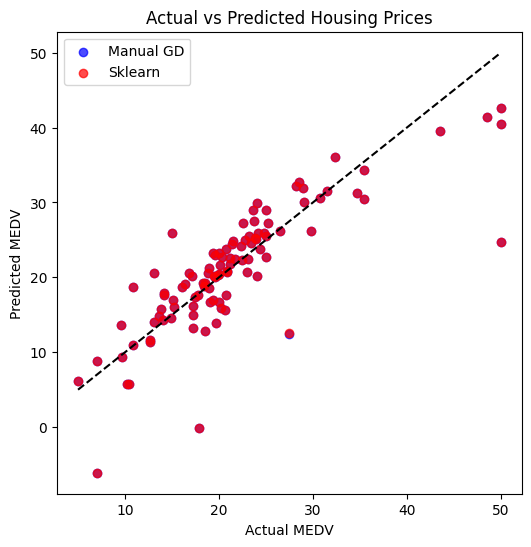

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_test, alpha=0.7, color='blue', label="Manual GD")
plt.scatter(y_test, sklearn_preds_test, alpha=0.7, color='red', label="Sklearn")
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted Housing Prices")
plt.legend()
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')  # 45-degree line
plt.show()


In [24]:
print("Manual Gradient Descent RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("Sklearn LinearRegression RMSE:", np.sqrt(mean_squared_error(y_test, sklearn_preds_test)))


Manual Gradient Descent RMSE: 4.928833025553146
Sklearn LinearRegression RMSE: 4.928602182665336
